In [7]:
from camcom import ImageCache
import numpy as np
import io
from PIL import Image
from matplotlib import pyplot as plt
from subprocess import Popen, PIPE
import time 
ic = ImageCache(host="/var/run/memcached/memcached.sock")
filename="raw1"
w, h = 640, 400

#libcamera-raw --width 640 --height 480 ---n --framerate 120 -o mem://
# p = Popen(["libcamera-raw", "--width", "640", "--height", "480" "--framerate", "120", "---n", "-o", "mem://"], shell=True, stdout=PIPE)
# p = Popen(["libcamera-hello --list"], shell=True, stdout=PIPE, stdin=PIPE)
# p = Popen(["libcamera-raw --width 640 --height 400 ---n --framerate 5 -o mem://"], shell=True)
raw_image = ic.get("1660298417136")
print(len(raw_image))

256000


In [8]:
"""
while True:
    time.sleep(1)
    output = p.stdout.readline()
    print(output)
    if output == '' and p.poll() is not None:
        break
    if output:
        print(output.strip())
rc = p.poll()
print(rc)


for line in iter(p.stdout.readline, ''):
    time.sleep(1)
    print(line.strip())
    image_data = ic.get("1658758455890")
    image = Image.frombytes('L', (w,h), image_data, 'raw')
    # image.save("./test.bmp")
    arr = np.array(image.getdata()).reshape(image.size[0], image.size[1], 1)
"""

'\nwhile True:\n    time.sleep(1)\n    output = p.stdout.readline()\n    print(output)\n    if output == \'\' and p.poll() is not None:\n        break\n    if output:\n        print(output.strip())\nrc = p.poll()\nprint(rc)\n\n\nfor line in iter(p.stdout.readline, \'\'):\n    time.sleep(1)\n    print(line.strip())\n    image_data = ic.get("1658758455890")\n    image = Image.frombytes(\'L\', (w,h), image_data, \'raw\')\n    # image.save("./test.bmp")\n    arr = np.array(image.getdata()).reshape(image.size[0], image.size[1], 1)\n'

# PIL

In [9]:
image = Image.frombytes('L', (w,h), raw_image, 'raw')
image.save(filename + ".bmp")
pildata_arr = np.array(image.getdata()).reshape(image.size[0], image.size[1], 1)

# NUMPY

256000
(400, 640, 1)


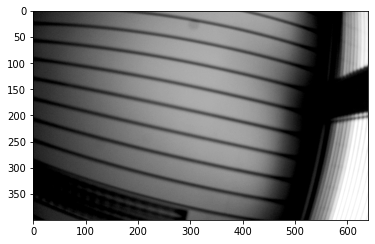

In [10]:
print(len(raw_image))
A = np.frombuffer(raw_image, dtype='uint8')
A = np.reshape(A, (h, w, 1))
print(A.shape)
plt.imshow(A, cmap='gray')

In [11]:
f = open('./image.raw', 'wb')
f.write(raw_image)
f.close()

# Benchmark

In [12]:
p = Popen(["libcamera-raw --width 640 --height 400 ---n -o mem:// --roi 0.25,0.25,0.5,0.5 --framerate 10"], shell=True, stdout = PIPE, env={'libcamera-raw': '/usr/local/bin/libcamera-raw'})
output = p.communicate()
p = Popen(["libcamera-raw --width 640 --height 400 ---n -o mem:// --roi 0.25,0.25,0.5,0.5 --framerate 10"], shell=True, stdout = PIPE, env={'libcamera-raw': '/usr/local/bin/libcamera-raw'})
output = p.communicate()

[1:22:34.555158936] [13974]  INFO Camera camera_manager.cpp:293 libcamera v0.0.0+3734-d010a51a
[1:22:34.560100546] [13975]  WARN CameraSensorProperties camera_sensor_properties.cpp:174 No static properties available for 'ov9281'
[1:22:34.560287062] [13975]  WARN CameraSensorProperties camera_sensor_properties.cpp:176 Please consider updating the camera sensor properties database
[1:22:34.571430467] [13975]  INFO RPI raspberrypi.cpp:1368 Registered camera /base/soc/i2c0mux/i2c@1/ov9281@60 to Unicam device /dev/media0 and ISP device /dev/media2
Stream configuration adjusted
[1:22:34.572606209] [13974]  INFO Camera camera.cpp:1029 configuring streams: (0) 640x400-YUV420 (1) 640x400-NV12
[1:22:34.573518399] [13975]  INFO RPI raspberrypi.cpp:759 Sensor: /base/soc/i2c0mux/i2c@1/ov9281@60 - Selected sensor format: 640x400-Y10_1X10 - Selected unicam format: 640x400-Y10P
[1:22:34.587326783] [13979]  WARN IPARPI raspberrypi.cpp:916 Could not set SATURATION - no ccm algorithm
[1:22:34.587391133] 